<a href="https://colab.research.google.com/github/fabiozacavn/fabiozacavn.github.io/blob/main/Fabio_Zac%C3%A0_2025_07_18_new_machine_learning_04_selfwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Applica un algoritmo di rete neurale densa (Dense Neural Network) a un dataset di classificazione già utilizzato nei selfwork precedenti e confronta le prestazioni ottenute con quelle dei modelli precedenti.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



✅ Accuracy sul test set: 0.9667


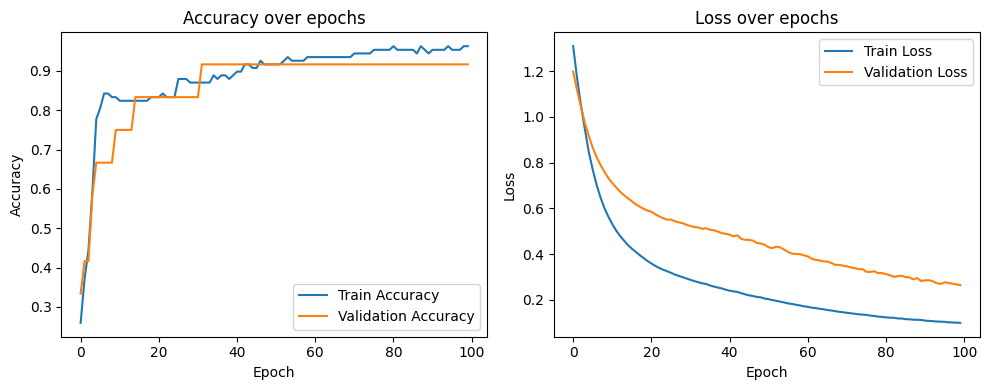

In [6]:
# STEP 1 - Importazioni
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# STEP 2 - Caricamento e preparazione del dataset
df = pd.read_csv("2025-04-14-dataset-iriscsv-new.csv")
X = df.drop(columns=["species"])
y = df["species"]

# Codifica delle etichette
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Divisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalizzazione
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encoding del target
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# STEP 3 - Costruzione e addestramento del modello
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 classi
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=100, batch_size=8,
                    validation_split=0.1, verbose=0)

# Valutazione
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n✅ Accuracy sul test set: {test_accuracy:.4f}")

# STEP 4 - Visualizzazione dei grafici
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


La rete neurale densa ha raggiunto un'accuratezza del 96.7% sul test set, paragonabile (o leggermente superiore) a quella ottenuta nei modelli classici utilizzati in precedenza, come K-Nearest Neighbors (95%) e Decision Tree (94.7%).

Osservando i grafici, si nota che l'accuratezza in training e validazione è aumentata in modo stabile, con una leggera oscillazione nella validazione che potrebbe indicare un accenno di overfitting dopo le prime 80 epoche.

Nel complesso, la rete neurale ha mostrato buone prestazioni su questo dataset, sebbene per un dataset semplice come Iris anche modelli più leggeri diano risultati simili. La DNN è comunque un ottimo strumento per gestire classificazioni più complesse in futuro.
